In [1]:
# Importing Libraries
from src import data_loader, features, model, evaluate, utils
import yaml

from sklearn.model_selection import train_test_split

In [2]:
# Loading dataset
config = yaml.safe_load(open("config/config.yaml"))

df = data_loader.load_data(config['data']['raw_path'])
df = data_loader.clean_data(df)

# Pre-processing

In [3]:
# Encoding
categorical_cols = ['airline', 
                    'source_city', 
                    'departure_time', 
                    'stops', 
                    'arrival_time', 
                    'destination_city', 
                    'class']

df = features.encode_features(df, categorical_cols)

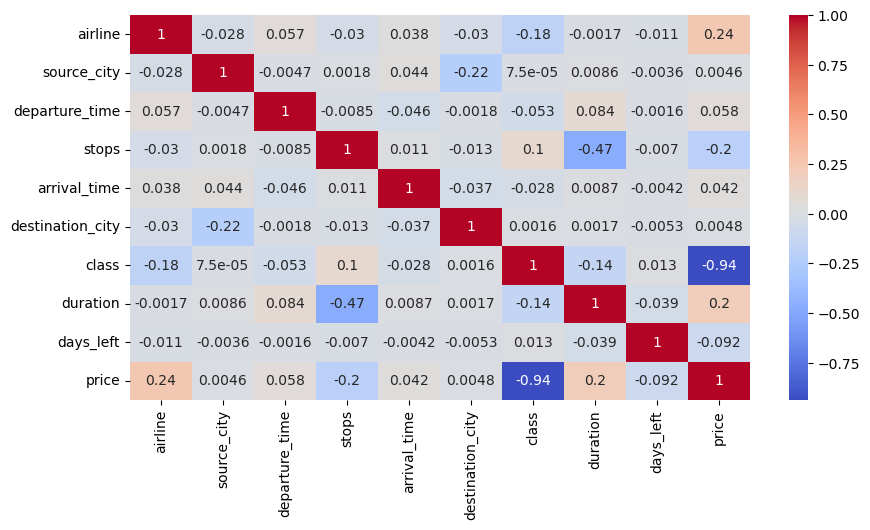

In [4]:
utils.heatmap(df)

In [5]:
# Target variables selection
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
y = df['price']

In [6]:
# Variance Inflation Factor
utils.vif(X)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


,feature,VIF
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.size, y.size)

2701377 300153


In [8]:
# Scaling X
X_train = features.scale_features(X_train)
X_test = features.scale_features(X_test)

# Linear Regression

In [9]:
# Linear Regression Model
model_type = config['models']['linear_regressor']
model_obj = model.build_model(model_type['type'], model_type['params'])
model.train_model(model_obj, X_train, y_train)

LinearRegression()

In [10]:
evaluate.evaluate(model_obj, X_test, y_test)

LinearRegression()

r2: 0.9045526175497736
MSE: 49201433.711640455
RMSE: 7014.373365571614
MAE: 4627.3552157602
RMAE: 0.43614483147130806


In [11]:
evaluate.pred_values(model_obj, X_test, y_test)

       Actual Value  Predicted Value
0            7366.0      4572.477222
1           64831.0     52809.226907
2            6195.0      7857.626650
3           60160.0     56096.253996
4            6578.0      6656.438105
...             ...              ...
60026        5026.0      5820.248216
60027        3001.0       486.438325
60028        6734.0      5837.956605
60029        5082.0     -1555.511279
60030       66465.0     58744.175762

[60031 rows x 2 columns]


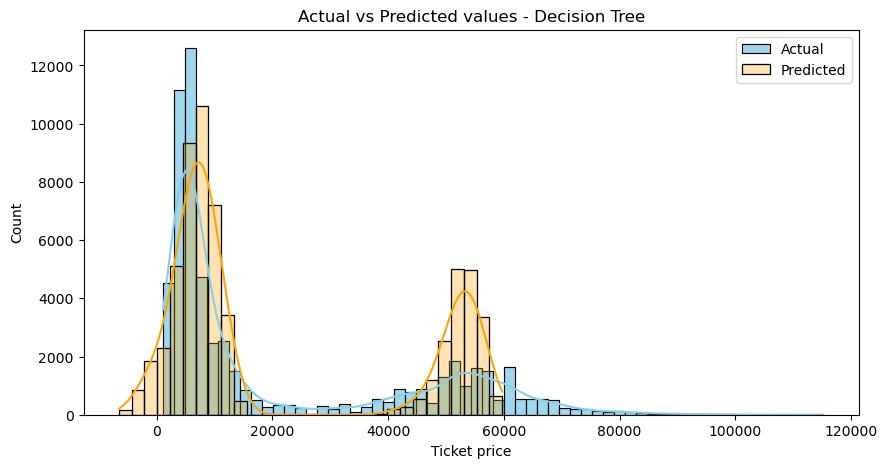

In [12]:
evaluate.pred_plot(model_obj, X_test, y_test)

# Decision Tree

In [13]:
# Decision Tree Model
model_type = config['models']['decision_tree']
model_obj = model.build_model(model_type['type'], model_type['params'])
model.train_model(model_obj, X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [14]:
evaluate.evaluate(model_obj, X_test, y_test)

DecisionTreeRegressor(max_depth=10)

r2: 0.959587575349598
MSE: 20831888.53921998
RMSE: 4564.196373866924
MAE: 2561.013224634208
RMAE: 0.17291193657394216


In [15]:
evaluate.pred_values(model_obj, X_test, y_test)

       Actual Value  Predicted Value
0            7366.0      5296.141315
1           64831.0     65315.162910
2            6195.0      6662.930579
3           60160.0     54642.640913
4            6578.0      5296.141315
...             ...              ...
60026        5026.0      5296.141315
60027        3001.0      3155.720280
60028        6734.0      5296.141315
60029        5082.0      3155.720280
60030       66465.0     68413.508333

[60031 rows x 2 columns]


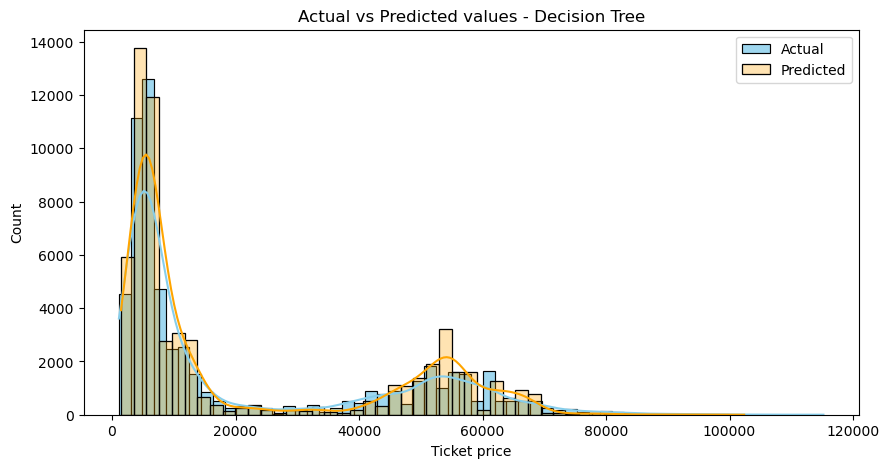

In [16]:
evaluate.pred_plot(model_obj, X_test, y_test)

# Random Forest

In [17]:
# Random Forest Regressor Model
model_type = config['models']['random_forest']
model_obj = model.build_model(model_type['type'], model_type['params'])
model.train_model(model_obj, X_train, y_train)

RandomForestRegressor(max_depth=10)

In [18]:
evaluate.evaluate(model_obj, X_test, y_test)

RandomForestRegressor(max_depth=10)

r2: 0.9617159185085343
MSE: 19734765.368716747
RMSE: 4442.382848057644
MAE: 2494.5283440894955
RMAE: 0.16849112699664265


In [19]:
evaluate.pred_values(model_obj, X_test, y_test)

       Actual Value  Predicted Value
0            7366.0      5293.708077
1           64831.0     65377.397080
2            6195.0      6787.233142
3           60160.0     54395.470477
4            6578.0      5293.708077
...             ...              ...
60026        5026.0      5293.708077
60027        3001.0      3057.873170
60028        6734.0      5293.708077
60029        5082.0      3541.311814
60030       66465.0     66866.200439

[60031 rows x 2 columns]


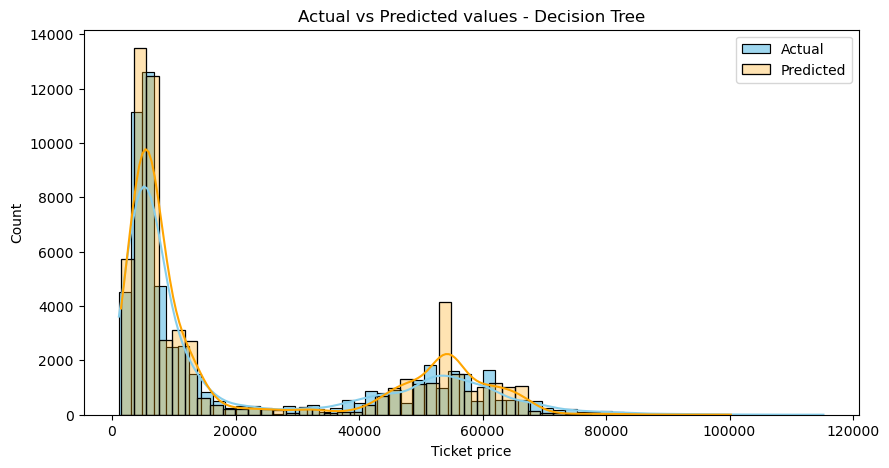

In [20]:
evaluate.pred_plot(model_obj, X_test, y_test)